#### Algoritmo de predição de propriedades de biodiesel baseado no perfil de ácido graxo


Aluno: Abner Vieira Pereira

---

O presente algoritmo objetiva criar modelos de predição de propriedades de biodiesel com base em seus perfis de ácidos graxos, para isso utilizar-se-á uma biblioteca de machine learning, a fim de treinar e testar o banco de dados obtido e obter a equação de regressão multi-linear para cada propriedade a ser analisada

In [1]:
#importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_base_cn = pd.read_excel('dados_CN.xlsx')#importando o banco de dados
#data_base_cn 

In [3]:
data_base_cn = data_base_cn.dropna() #removendo as colunas vazias

In [4]:
data_base_cn.head()

,C12:0,C14:0,C15:0,C16:0,C16:1,C17:0,C18:0,C18:1,C18:2,C18:3,CN
0,3.43,3.43,5.02,10.30,10.30,3.43,8.59,22.19,9.51,23.78,47.02
1,7.75,4.20,6.13,12.59,12.59,4.20,10.49,14.69,11.62,15.74,44.76
2,3.89,7.17,5.68,11.66,11.66,3.89,9.72,13.60,5.83,26.91,47.62
3,7.00,7.00,5.54,11.38,11.38,3.79,9.48,24.51,5.69,14.22,53.15
4,4.48,4.48,9.38,13.43,13.43,4.48,11.19,15.66,6.71,16.78,52.60


In [5]:
#aqui posso comentar sobre os ácidos graxos que serão analisados no modelo e cada propriedade. Talvez seja possível fazer um estudo prévio dos dados a serem analisados

#### Vizualização dos dados

In [6]:
data_base_cn.columns

Index(['C12:0', 'C14:0', 'C15:0', 'C16:0', 'C16:1', 'C17:0', 'C18:0', 'C18:1',
       'C18:2', 'C18:3', 'CN'],
      dtype='object')

In [7]:
data_base_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C12:0   148 non-null    float64
 1   C14:0   148 non-null    float64
 2   C15:0   148 non-null    float64
 3   C16:0   148 non-null    float64
 4   C16:1   148 non-null    float64
 5   C17:0   148 non-null    float64
 6   C18:0   148 non-null    float64
 7   C18:1   148 non-null    float64
 8   C18:2   148 non-null    float64
 9   C18:3   148 non-null    float64
 10  CN      148 non-null    float64
dtypes: float64(11)
memory usage: 12.8 KB


In [8]:
data_base_cn.describe()

,C12:0,C14:0,C15:0,C16:0,C16:1,C17:0,C18:0,C18:1,C18:2,C18:3,CN
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,4.683919,4.683243,5.868311,13.930473,13.930743,4.683784,11.634189,16.217297,7.010811,17.357432,51.937635
std,1.442111,1.441887,1.183285,3.910239,3.910161,1.441774,3.346983,4.435444,2.111279,4.683520,2.571783
min,0.000000,0.000000,2.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.760000
25%,3.390000,3.382500,4.892500,10.440000,10.440000,3.390000,8.572500,12.267500,5.080000,13.245000,50.015000
50%,4.585000,4.585000,5.880000,13.755000,13.755000,4.585000,11.465000,16.050000,6.875000,17.195000,51.950000
75%,5.880000,5.840000,6.760000,17.180000,17.067500,5.870000,14.290000,19.782500,8.675000,20.925000,53.962500
max,8.890000,8.890000,9.380000,24.490000,24.490000,8.890000,20.830000,28.000000,13.040000,29.700000,60.430000


<Figure size 2000x1500 with 0 Axes>

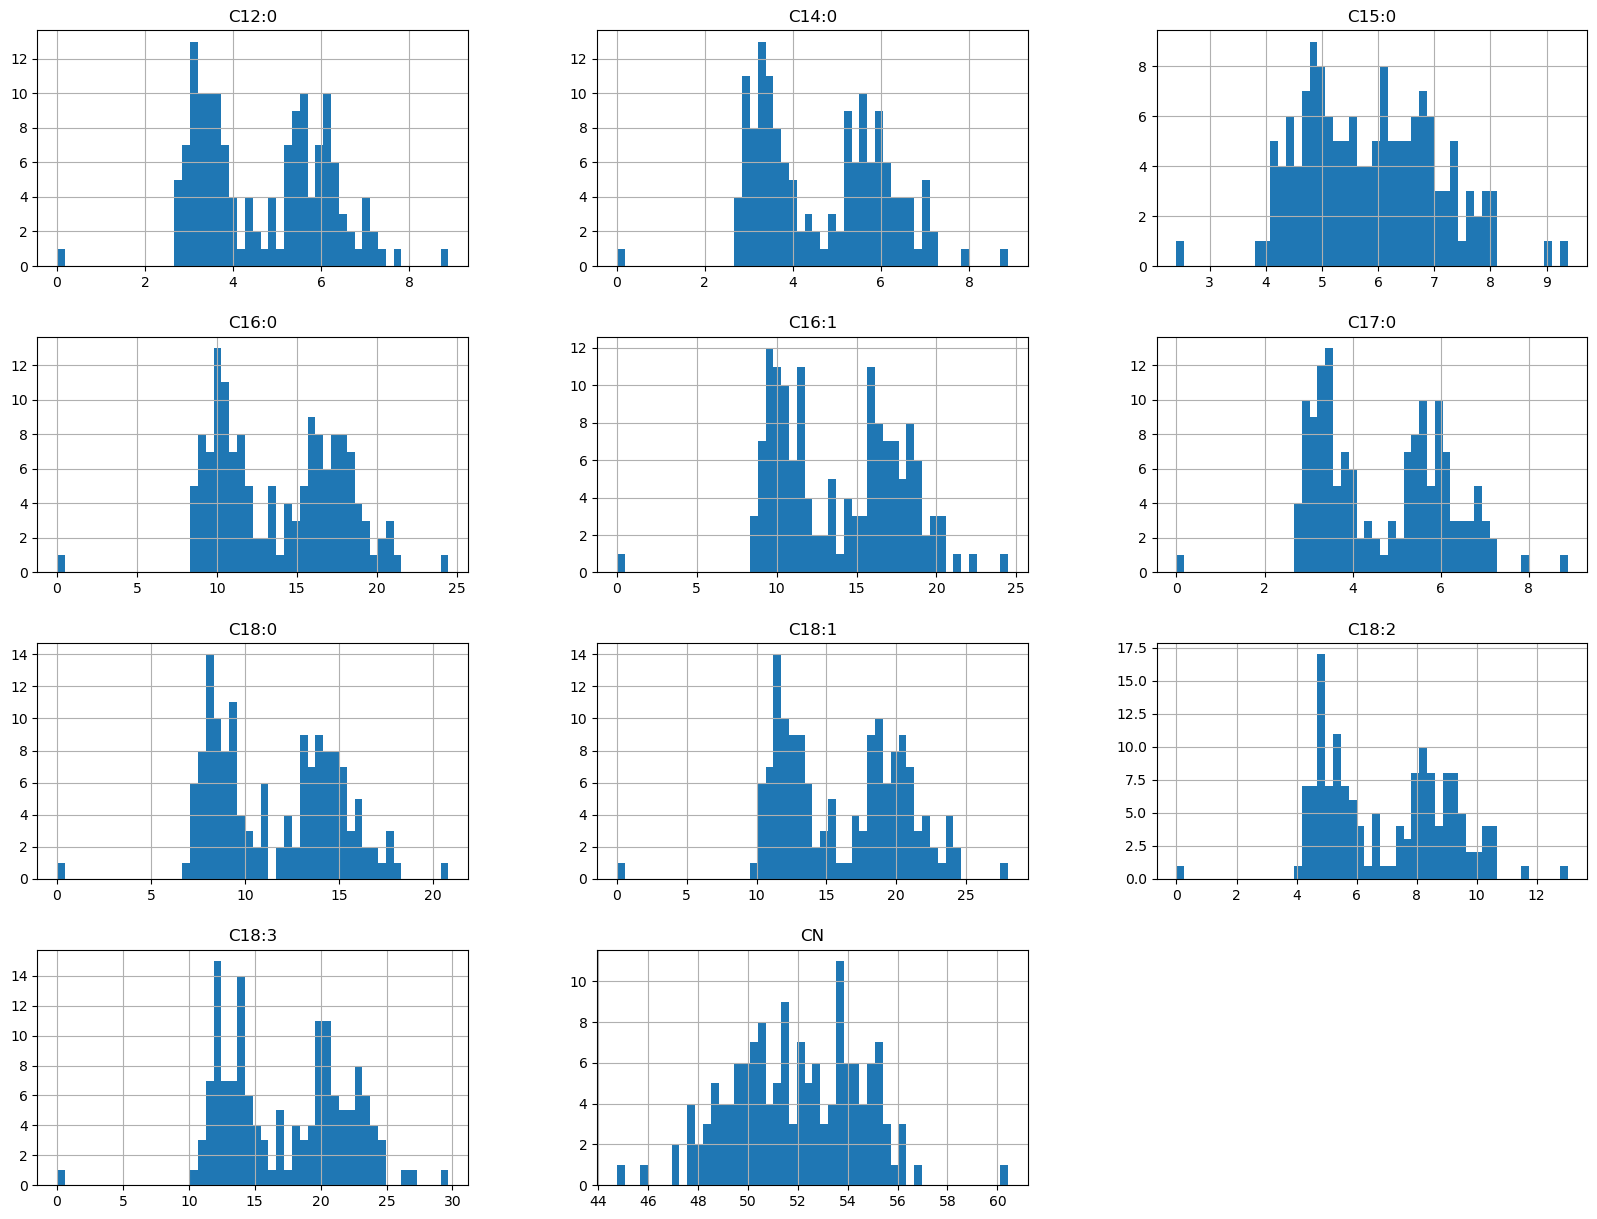

In [9]:
plt.figure(figsize = (20,15))
data_base_cn.hist(bins=50, figsize = (20,15))
plt.show()

* Procurando as correlações 

In [10]:
corr_matrix = data_base_cn.corr()

In [11]:
corr_matrix['CN'].sort_values(ascending=False)

CN       1.000000
C16:0    0.425268
C18:0    0.394904
C17:0    0.183311
C15:0    0.162060
C14:0    0.158094
C18:1    0.109141
C12:0    0.091154
C16:1    0.014404
C18:2   -0.132956
C18:3   -0.866981
Name: CN, dtype: float64

In [12]:
from pandas.plotting import scatter_matrix

In [13]:
attributes = ['CN','C12:0', 'C14:0', 'C15:0', 'C16:0', 'C16:1', 'C17:0', 'C18:0', 'C18:1',
       'C18:2', 'C18:3']

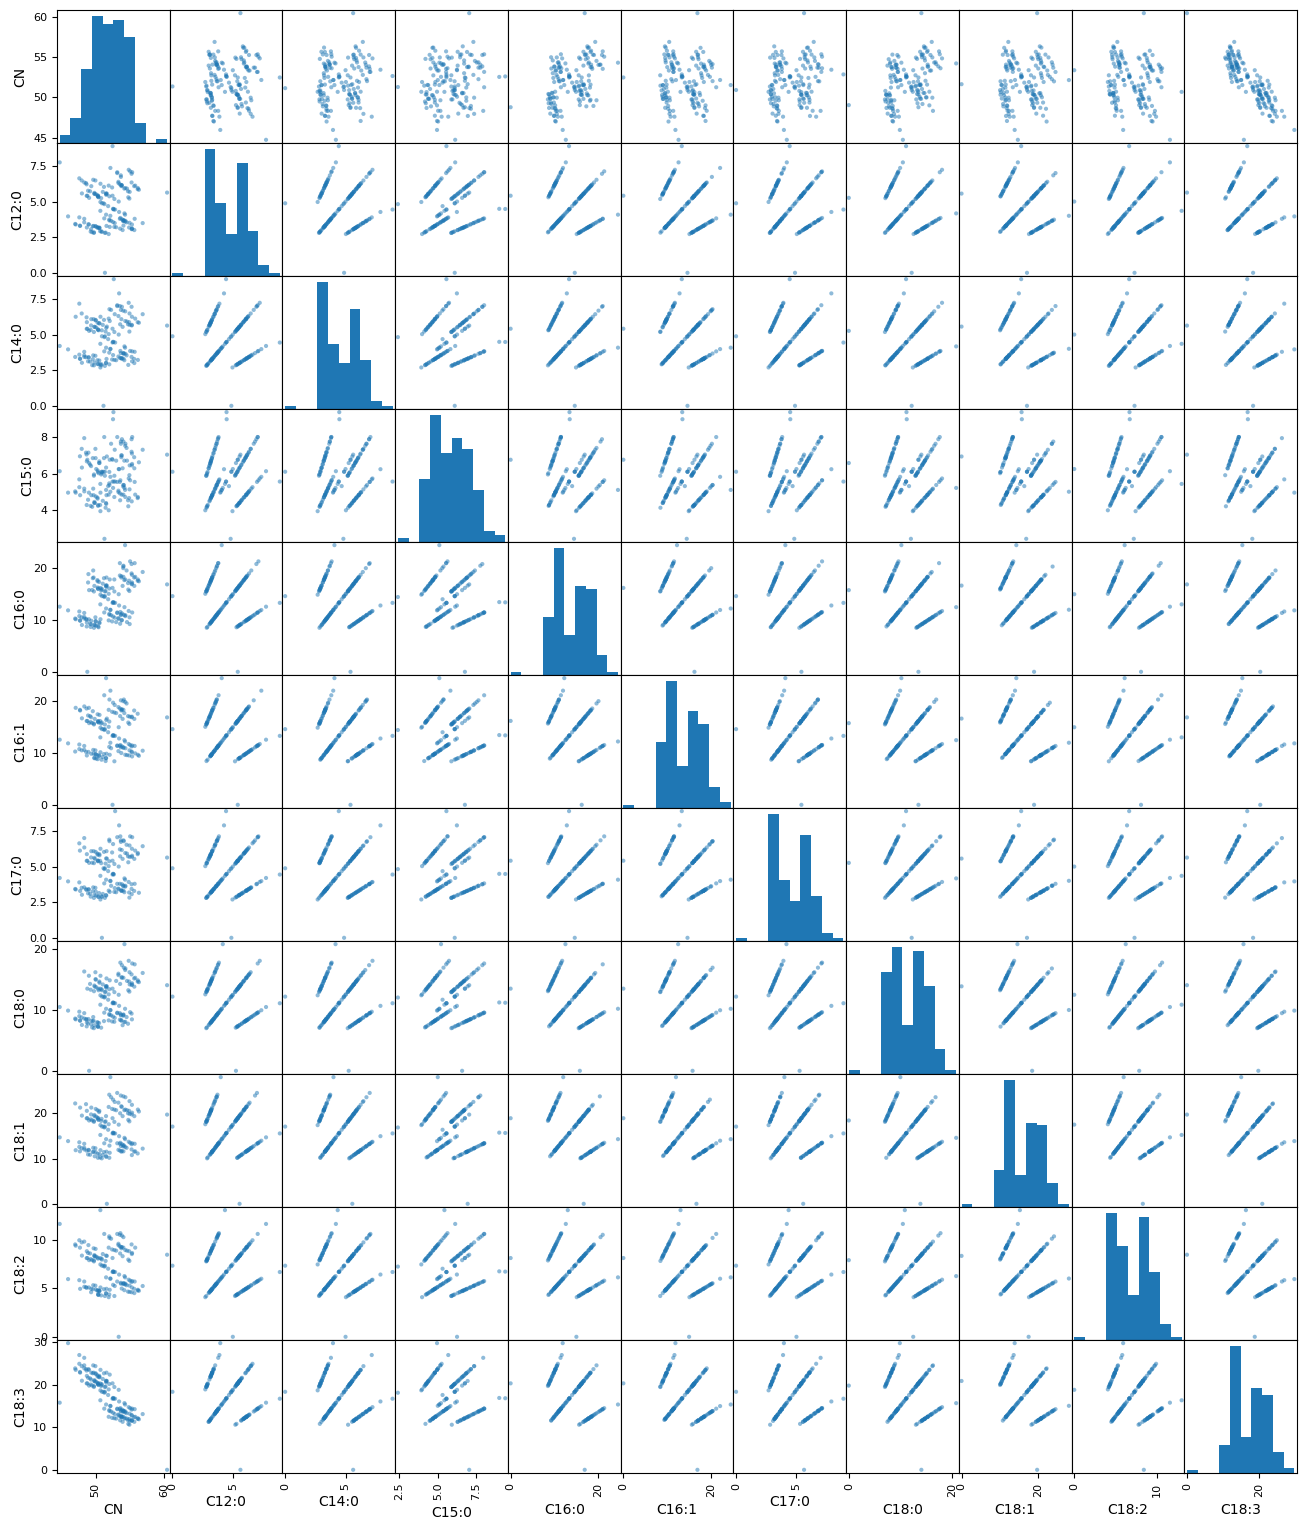

In [14]:
scatter_matrix(data_base_cn[attributes], figsize=(16,19));

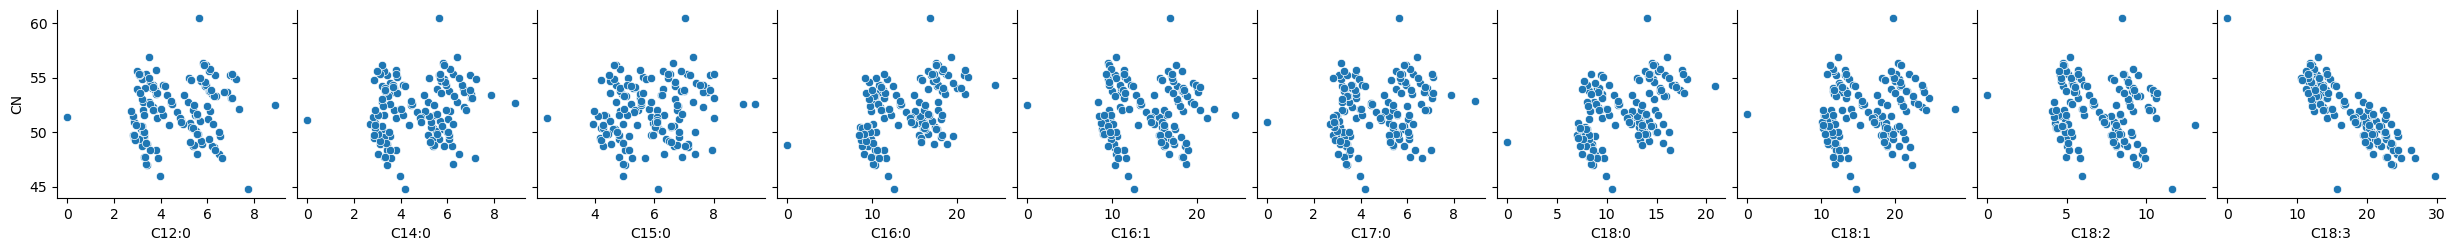

In [15]:
sns.pairplot(data_base_cn, x_vars=['C12:0', 'C14:0', 'C15:0', 'C16:0', 'C16:1', 'C17:0', 'C18:0', 'C18:1','C18:2', 'C18:3'], y_vars='CN', kind='scatter');

---

#### Aplicando os códigos de Machine Learning:

* Definindo os eixos x e y:

In [16]:
Eixo_x = data_base_cn.drop(labels= ['CN'], axis=1) #Dessa forma eu consigo transformar mais de uma coluna em um array, no caso foram escolhidas todas as colunas referentes a um ácido graxo 
#Eixo_x

In [17]:
Eixo_y = data_base_cn['CN'] #Dessa maneira é possível selecionar apenas uma coluna e transformá-la em array. Foi selecionado o número de cetano em primeira análise
#Eixo_y

In [18]:
#sns.boxplot(data = data_base, y='CN',x='C12:0')

#### Treinando o modelo

In [19]:
from sklearn.model_selection import train_test_split #importando o móduko de treino e teste de modelo sklearn

In [20]:
x_train, x_test, y_train, y_test = train_test_split(Eixo_x, Eixo_y, test_size = 0.2, shuffle = True, random_state = 0) #aplicando o teste, as variáveis sempre seguem essa ordem (x treino, x teste, y treino, y teste), e os parametros passados são(eixo x, eixo y, tamanho do teste, )

<Axes: >

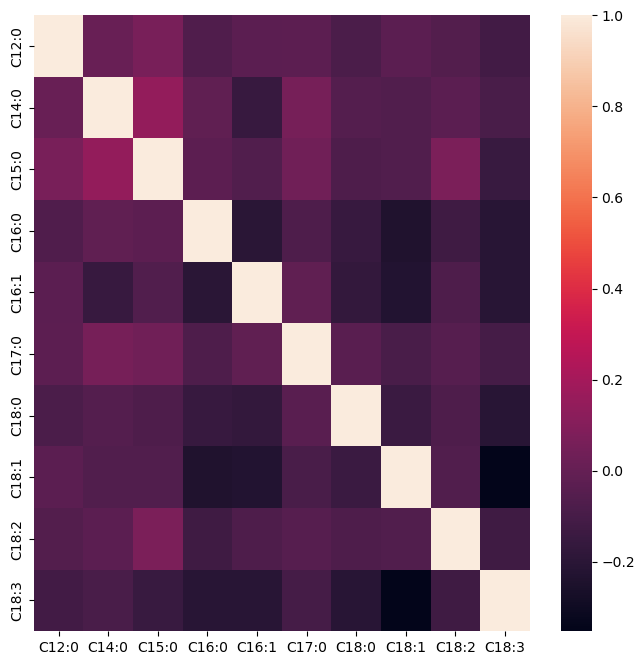

In [21]:
x_train = pd.DataFrame(x_train)

corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrmat)

In [22]:
from sklearn.linear_model import LinearRegression #importando o modelo de regressão linear

In [23]:
Eq_m1 = LinearRegression() #criando um modelo de regressão linear

In [24]:
Eq_m1.fit(x_train, y_train) #aplicando fit linear nos dados de treino

LinearRegression()

#### Fazendo a previsão

In [25]:
y_pred = Eq_m1.predict(x_test)

In [26]:
np.set_printoptions(precision=2)

In [27]:
# Convert Series objects to NumPy arrays
y_pred_array = np.array(y_pred)
y_test_array = np.array(y_test)

# Reshape the arrays
y_pred_reshaped = y_pred_array.reshape(len(y_pred), 1)
y_test_reshaped = y_test_array.reshape(len(y_test), 1)

# Concatenate the reshaped arrays
result = np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1)

In [28]:
result

array([[52.69, 52.73],
       [47.62, 47.97],
       [53.55, 53.68],
       [53.6 , 53.58],
       [50.42, 50.36],
       [54.18, 54.03],
       [54.08, 54.33],
       [49.62, 49.34],
       [51.19, 51.29],
       [49.89, 50.09],
       [50.86, 50.87],
       [52.99, 52.79],
       [52.99, 53.33],
       [51.  , 51.15],
       [50.76, 50.54],
       [51.5 , 51.52],
       [53.91, 54.06],
       [47.91, 47.74],
       [48.52, 48.7 ],
       [50.24, 50.02],
       [54.19, 54.05],
       [52.57, 52.54],
       [55.55, 55.63],
       [55.52, 55.27],
       [54.51, 54.32],
       [50.47, 50.26],
       [55.18, 55.34],
       [55.48, 55.78],
       [51.61, 51.35],
       [50.29, 50.69]])

In [29]:
x_test = pd.DataFrame(x_test)

In [30]:
x_test = x_test.reset_index(drop=True)

In [31]:
y_compare = pd.DataFrame(result)

In [32]:
y_compare = y_compare.rename(index=str, columns={0:'y_pred', 1:'y_tes'})

In [33]:
y_compare = y_compare.reset_index(drop=True)

In [34]:
final_result = pd.concat([y_compare,x_test],axis=1)
final_result

,y_pred,y_tes,C12:0,C14:0,C15:0,C16:0,C16:1,C17:0,C18:0,C18:1,C18:2,C18:3
0,52.686269,52.73,3.22,3.22,4.71,17.85,17.85,3.22,8.06,20.83,8.93,12.09
1,47.619695,47.97,6.48,6.48,7.36,10.53,10.53,3.51,8.78,12.29,9.72,24.31
2,53.551540,53.68,6.84,3.70,7.76,11.11,11.11,6.84,9.26,23.93,5.56,13.89
3,53.596657,53.58,3.10,5.72,4.53,9.29,17.15,5.72,14.29,20.01,8.58,11.61
4,50.424776,50.36,5.33,5.33,4.22,16.00,16.00,2.89,7.22,18.67,4.33,20.00
5,54.184178,54.03,3.62,6.68,5.29,20.04,20.04,3.62,9.05,12.67,5.43,13.57
6,54.082480,54.33,5.95,5.95,4.71,17.85,9.67,5.95,8.06,20.83,8.93,12.09
7,49.624745,49.34,3.06,5.64,6.41,9.17,16.93,5.64,7.64,19.75,4.59,21.16
8,51.185515,51.29,4.82,4.82,2.41,14.46,14.46,4.82,12.05,16.87,7.23,18.07
9,49.887609,50.09,5.50,5.50,6.25,8.94,8.94,2.98,13.75,19.26,8.25,20.63


In [35]:
Eq_m1.score(x_train, y_train) #avaliando o modelo

0.9495861891822509

#### Equação do Modelo

In [36]:
# descobrindo o valor do coeficiente linear
c = Eq_m1.intercept_
c

230.67856841769668

In [37]:
#determinando os coeficientes angulares 
m = Eq_m1.coef_
m

array([-1.75, -1.61, -1.6 , -1.59, -1.81, -1.57, -1.56, -1.76, -2.04,
       -2.18])

In [38]:
from sympy import *
import sympy as sy

In [39]:
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10, CN = sy.symbols("x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10 CN")

In [40]:
min(m) # O maior valor de m indica maior influencia em y

-2.1828041112784002

In [41]:
cn = m[0]*x1 + m[1]*x2 + m[2]*x3 + m[3]*x4 + m[4]*x5 + m[5]*x6 + m[6]*x7 + m[7]*x8 + m[8]*x9 + m[9]*x10 + c
eq_cn = Eq(CN, cn)
eq_cn

Eq(CN, -1.7492480457287*x_1 - 2.1828041112784*x_10 - 1.60553111642889*x_2 - 1.59758001616061*x_3 - 1.58756596289857*x_4 - 1.81315493566605*x_5 - 1.5666114135492*x_6 - 1.56071107332216*x_7 - 1.76478200913945*x_8 - 2.03674241210786*x_9 + 230.678568417697)

In [42]:
dic={x1:0, x2:0.38 ,x3:0, x4:6.27, x5:0.23, x6:0.27, x7:1.28, x8:75.19, x9:3.09, x10:5.20}
cn.subs(dic).round(2)

#{x1:0 ,x2:0 ,x3:0.11 , x4:44.99 , x5:5.86 , x6:5.72 , x7:1.09 , x8:1.67 , x9:25.4 , x10:12.49 } (chlorella vulgaris fotoautotrofica)
#{x1:0.1 ,x2:0.63 ,x3:0 , x4:40.31 , x5:3.16 , x6:0.51 , x7:8.01 , x8:29.29 , x9:8.54 , x10:1.57 } (vulgaris)
#{x1:0.51, x2:0.69, x3:0, x4:19.03, x5:21.97, x6:0, x7:2.35, x8:48.21, x9:1.29, x10:1.54} (chrorella sp)
#{x1:0, x2:0.38 ,x3:0, x4:6.27, x5:0.23, x6:0.27, x7:1.28, x8:75.19, x9:3.09, x10:5.20} (terribiles)
#{x1:0.77, x2:2.35 ,x3:0, x4:13.26, x5:0.63, x6: 0.67, x7:4.17, x8:2.19, x9:14.88, x10:0.20}(nannochloropsis sp)
#{x1:0.38, x2:0.19 ,x3:0, x4:6.45, x5:34.64, x6:1.85 , x7:6.03, x8:0.32, x9:1.39, x10:7.22} (tetraselmis)

66.94

Verificando o modelo

In [43]:
y_pred_train = Eq_m1.predict(x_train)

In [44]:
y_pred_train

array([47.21, 52.07, 46.98, 51.75, 50.16, 50.09, 47.76, 48.92, 53.39,
       52.03, 51.29, 53.95, 54.31, 52.21, 49.97, 50.85, 52.87, 49.78,
       50.67, 53.43, 51.93, 54.69, 49.54, 49.8 , 54.76, 54.36, 51.59,
       54.6 , 52.94, 50.96, 50.85, 52.71, 51.43, 52.7 , 53.39, 51.77,
       55.03, 51.07, 55.1 , 47.63, 53.03, 56.17, 56.15, 52.14, 54.48,
       50.56, 48.82, 54.77, 50.4 , 49.56, 55.51, 49.58, 53.76, 55.29,
       54.85, 57.07, 50.87, 51.51, 51.59, 49.66, 52.58, 55.88, 51.94,
       48.71, 48.51, 52.13, 54.24, 55.15, 46.91, 53.54, 49.77, 53.63,
       50.81, 49.34, 48.63, 54.86, 53.44, 52.81, 53.2 , 52.06, 52.93,
       51.81, 52.27, 50.74, 60.27, 51.61, 54.18, 55.31, 48.28, 48.61,
       50.64, 49.32, 48.16, 46.04, 56.33, 49.86, 51.7 , 49.14, 49.66,
       52.21, 55.81, 54.9 , 48.6 , 53.75, 50.81, 48.92, 52.73, 50.52,
       54.04, 53.68, 50.7 , 48.47, 47.75, 49.51, 54.33, 54.65, 53.49,
       51.22])

#### Prevendo o os resultados dos conjuntos de testes

In [45]:
y_pred = Eq_m1.predict(x_test)
y_pred

array([52.69, 47.62, 53.55, 53.6 , 50.42, 54.18, 54.08, 49.62, 51.19,
       49.89, 50.86, 52.99, 52.99, 51.  , 50.76, 51.5 , 53.91, 47.91,
       48.52, 50.24, 54.19, 52.57, 55.55, 55.52, 54.51, 50.47, 55.18,
       55.48, 51.61, 50.29])

In [46]:
Eq_m1.predict([[3.43,3.43,5.02,10.30,10.30,3.43,8.59,22.19,9.51,23.78]])

C:\Users\abner\OneDrive - cefet-rj.br\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46.91])

O resultado acima confirma o que foi encontrado pelo dicionário

#### Avaliando o modelo

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
r2_score(y_train, y_pred_train)

0.9495861891822509

In [49]:
MMSE_sol = np.sqrt(mean_squared_error(y_train,y_pred_train))
MMSE_sol

0.5910336854326791

#### Plotando os Resultados

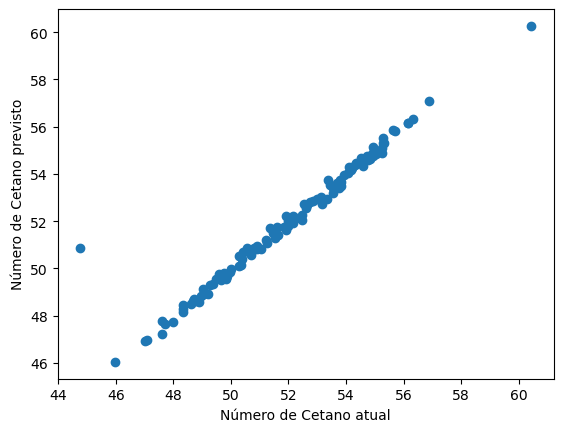

In [50]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Número de Cetano atual')
plt.ylabel('Número de Cetano previsto')
plt.show();

## Usando redes neurais

In [51]:
import tensorflow as tf
import keras as ke

In [52]:
data = pd.read_excel('dados_CN.xlsx')
data.head()

,C12:0,C14:0,C15:0,C16:0,C16:1,C17:0,C18:0,C18:1,C18:2,C18:3,CN
0,3.43,3.43,5.02,10.30,10.30,3.43,8.59,22.19,9.51,23.78,47.02
1,7.75,4.20,6.13,12.59,12.59,4.20,10.49,14.69,11.62,15.74,44.76
2,3.89,7.17,5.68,11.66,11.66,3.89,9.72,13.60,5.83,26.91,47.62
3,7.00,7.00,5.54,11.38,11.38,3.79,9.48,24.51,5.69,14.22,53.15
4,4.48,4.48,9.38,13.43,13.43,4.48,11.19,15.66,6.71,16.78,52.60


In [53]:
x = data.drop(["CN"], axis=1)
y = data["CN"]

In [54]:
from sklearn.model_selection import train_test_split
xtr,xval,ytr,yval = train_test_split(x,y,train_size=0.8,random_state = 0)
xtr.shape,xval.shape,ytr.shape,yval.shape

((118, 10), (30, 10), (118,), (30,))

In [55]:
xtr.head()

,C12:0,C14:0,C15:0,C16:0,C16:1,C17:0,C18:0,C18:1,C18:2,C18:3
33,6.63,3.59,5.25,10.77,10.77,6.63,8.98,12.57,9.94,24.86
78,3.22,5.95,6.76,17.85,9.67,3.22,14.88,11.28,4.84,22.32
18,3.39,6.25,4.95,10.16,18.75,3.39,8.46,11.85,9.38,23.44
127,4.68,4.68,5.31,14.03,14.03,4.68,11.69,16.37,7.01,17.54
63,5.37,5.37,6.09,16.10,16.10,5.37,7.27,10.17,8.05,20.12


In [56]:
## Esse procedimento deve ser realizado caso existam colunas que envolvam strings
'''
-> cat_cols = ['',''...], declarar uma varável que armazene os nomes de todas as colunas strings

from category_encoders import OneHotEncoder
cat_encoder = OneHotEncoder(cols = cat_col, drop_invariant = true, handle_missing=0)
xtr = cat_encoder.fit_transform(xtr)
xval = cat_encoder.transform(xval)

'''

"\n-> cat_cols = ['',''...], declarar uma varável que armazene os nomes de todas as colunas strings\n\nfrom category_encoders import OneHotEncoder\ncat_encoder = OneHotEncoder(cols = cat_col, drop_invariant = true, handle_missing=0)\nxtr = cat_encoder.fit_transform(xtr)\nxval = cat_encoder.transform(xval)\n\n"

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
xtr = imputer.fit_transform(xtr)
xval = imputer.transform(xval)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xval = scaler.transform(xval)

In [59]:
xtr

array([[ 1.3 , -0.8 , -0.59, ..., -0.73,  1.39,  1.54],
       [-1.04,  0.88,  0.79, ..., -1.01, -1.08,  1.01],
       [-0.92,  1.1 , -0.86, ..., -0.89,  1.12,  1.24],
       ...,
       [ 1.71,  1.79, -0.15, ..., -0.47, -0.58, -0.58],
       [ 0.98, -0.98,  1.  , ..., -0.92,  1.05, -1.03],
       [ 0.89,  0.94,  0.87, ..., -0.98, -1.05,  1.07]])

In [60]:
# Transformando os dados de saídas em matrizes numpy, pois o tensorflow só aceita esse formato
ytr = ytr.values
yval = yval.values        

In [61]:
from tensorflow import keras as tfk

In [62]:
tf.random.set_seed(2)  #garante a aleatoriedade do teste

inp = tfk.layers.Input((xtr.shape[1], ))   #cria a layer inicial

hid1 = tfk.layers.Dense(100,activation='relu')(inp)   #layer escondida-conectada a layer inicial -para criar deep learning basta acrescentar mais uma camanda escondida

drop = tfk.layers.Dropout(0.5)(hid1) #forma de não memorizar os dados, evita o overfiting, é um hiperparametro a ser tunado

hid2 = tfk.layers.Dense(20,activation='relu')(drop)

out = tfk.layers.Dense(1,activation='relu')(hid2)   #Neurônio de saída

mdl = tfk.Model(inp,out)    #lida melhor com modelos complexos do que sequential

mdl.compile(loss='msle',optimizer='adam')

mdl.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 100)               1100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                2020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3141 (12.27 KB)
Trainable params: 3141 (12.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
es = tfk.callbacks.EarlyStopping(
    monitor='val_loss',min_delta=0.1, patience=10, mode='min',restore_best_weights=True
)

In [64]:
historia = mdl.fit(xtr,ytr,validation_data=(xval,yval), epochs = 10000, shuffle=True,batch_size=1,callbacks=[es])

Epoch 1/10000
118/118 [==============================] - 3s 7ms/step - loss: 15.3124 - val_loss: 12.3950
Epoch 2/10000
118/118 [==============================] - 0s 4ms/step - loss: 7.7061 - val_loss: 4.7923
Epoch 3/10000
118/118 [==============================] - 1s 5ms/step - loss: 3.7724 - val_loss: 2.6267
Epoch 4/10000
118/118 [==============================] - 0s 4ms/step - loss: 2.1386 - val_loss: 1.5393
Epoch 5/10000
118/118 [==============================] - 0s 3ms/step - loss: 1.2814 - val_loss: 0.9199
Epoch 6/10000
118/118 [==============================] - 0s 3ms/step - loss: 0.8068 - val_loss: 0.5472
Epoch 7/10000
118/118 [==============================] - 0s 3ms/step - loss: 0.4526 - val_loss: 0.3243
Epoch 8/10000
118/118 [==============================] - 0s 3ms/step - loss: 0.2750 - val_loss: 0.1915
Epoch 9/10000
118/118 [==============================] - 0s 3ms/step - loss: 0.1965 - val_loss: 0.1075
Epoch 10/10000
118/118 [==============================] - 0s 3ms/step -

In [65]:
# Obter os pesos do modelo
#weights = mdl.get_weights()

# Imprimir os pesos de cada camada
#for i, layer in enumerate(mdl.layers):
 #   layer_weights = weights[i]
  #  print(f"Pesos da camada {layer.name}:")
   # for j, weight in enumerate(layer_weights):
    #    print(f"Peso {j}: {weight}")


### Estatíticas

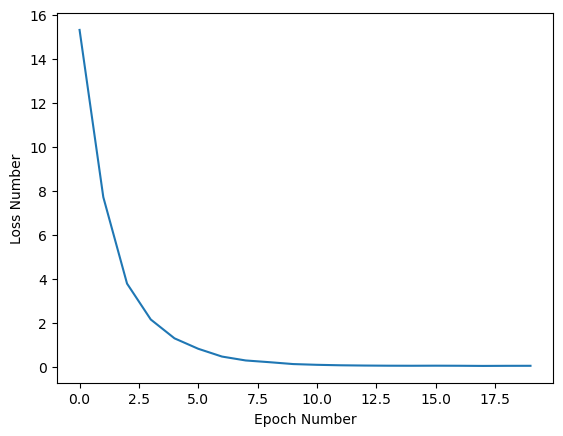

In [66]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Number')
plt.plot(historia.history['loss'])

In [67]:
input_data = np.array([0, 0, 0.11, 44.99, 5.86, 5.72, 1.09, 1.67, 25.4, 12.49])

In [68]:
input_data = input_data.reshape(1, -1)

In [69]:
predictions = mdl.predict(input_data)

1/1 [==============================] - 0s 191ms/step


In [70]:
print(predictions)

[[414.3]]


## Random Forests

In [71]:
data = pd.read_excel('dados_CN.xlsx')

In [72]:
data.head()

,C12:0,C14:0,C15:0,C16:0,C16:1,C17:0,C18:0,C18:1,C18:2,C18:3,CN
0,3.43,3.43,5.02,10.30,10.30,3.43,8.59,22.19,9.51,23.78,47.02
1,7.75,4.20,6.13,12.59,12.59,4.20,10.49,14.69,11.62,15.74,44.76
2,3.89,7.17,5.68,11.66,11.66,3.89,9.72,13.60,5.83,26.91,47.62
3,7.00,7.00,5.54,11.38,11.38,3.79,9.48,24.51,5.69,14.22,53.15
4,4.48,4.48,9.38,13.43,13.43,4.48,11.19,15.66,6.71,16.78,52.60


In [73]:
x = data.drop(["CN"], axis=1)
y = data["CN"]

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
xtr, xval, ytr, yval = train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
model_a = RandomForestRegressor(n_estimators = 1000,random_state = 0,n_jobs=-1)

In [77]:
model_a.fit(xtr,ytr)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [78]:
res = model_a.predict(xval)
res

array([53.9 , 47.81, 53.04, 54.31, 50.22, 54.46, 54.2 , 48.96, 51.4 ,
       49.59, 51.26, 52.87, 53.88, 51.44, 50.2 , 51.66, 54.16, 48.68,
       48.55, 50.03, 54.72, 52.63, 55.41, 55.54, 54.33, 50.3 , 54.19,
       54.82, 51.89, 51.18])

In [79]:
np.sqrt(mean_squared_error(yval,res))

0.5140436177991777

In [81]:
r2_score(yval, res)

0.9483562389052598

In [ ]:
input_array = np.array([0, 0.38 ,0, 6.27, 0.23, 0.27, 1.28, 75.19, 3.09, 5.20])
reshaped_array = input_array.reshape(1, -1)

#{x1:0 ,x2:0 ,x3:0.11 , x4:44.99 , x5:5.86 , x6:5.72 , x7:1.09 , x8:1.67 , x9:25.4 , x10:12.49 } (chlorella vulgaris fotoautotrofica)
#[0 ,0 ,0.11 , 44.99 , 5.86 , 5.72 , 1.09 , 1.67 , 25.4 , 12.49]
#{x1:0.1 ,x2:0.63 ,x3:0 , x4:40.31 , x5:3.16 , x6:0.51 , x7:8.01 , x8:29.29 , x9:8.54 , x10:1.57 } (vulgaris)
#{x1:0.51, x2:0.69, x3:0, x4:19.03, x5:21.97, x6:0, x7:2.35, x8:48.21, x9:1.29, x10:1.54} (chrorella sp)
#{x1:0, x2:0.38 ,x3:0, x4:6.27, x5:0.23, x6:0.27, x7:1.28, x8:75.19, x9:3.09, x10:5.20} (terribiles)
#[0, 0.38 ,0, 6.27, 0.23, 0.27, 1.28, 75.19, 3.09, 5.20]
#[:0, x2:0.38 ,x3:0, x4:6.27, x5:0.23, x6:0.27, x7:1.28, x8:75.19, x9:3.09, x10:5.20}
#{x1:0.77, x2:2.35 ,x3:0, x4:13.26, x5:0.63, x6: 0.67, x7:4.17, x8:2.19, x9:14.88, x10:0.20}(nannochloropsis sp)
#{x1:0.38, x2:0.19 ,x3:0, x4:6.45, x5:34.64, x6:1.85 , x7:6.03, x8:0.32, x9:1.39, x10:7.22} (tetraselmis)

In [ ]:
model_a.predict(reshaped_array)

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
dados = [10, 15, 20, 25, 30, 35, 40]

# Criar o gráfico boxplot
sns.boxplot(data=dados)

# Adicionar os pontos para representar os valores individuais
sns.stripplot(data=dados, color='red', size=4, alpha=0.6)

# Adicionar título e rótulo dos eixos
plt.title('Gráfico Boxplot com Dispersão')
plt.xlabel('Dados')
plt.ylabel('Valores')

# Mostrar o gráfico
plt.show()'''

## Shap analysis

In [ ]:
import shap 

In [ ]:
shap_values =shap.TreeExplainer(model_a).shap_values(xtr)
sh.summary_plot(shap_values, xtr, plot_type='bar')

In [ ]:
import alibi

In [ ]:
from alibi.explainers import ALE, plot_ale

In [ ]:
model_a_ale = ALE(model_a.predict, feature_names = xtr.columns, target_names=['CN'])
model_a_exp = model_a_ale.explain(np.array(xtr))

In [ ]:
int